App Success Predictor

*Goal:* Predict whether an app will be successful based on its metadata and user reviews using machine learning.

This project analyzes data from Google Play Store apps and user reviews to:
Explore market trends through EDA
Analyze sentiment patterns
Build models to predict app success

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [3]:
apps=pd.read_csv(r'C:\Users\karim\OneDrive\Desktop\google play\apps.csv')
reviews=pd.read_csv(r'C:\Users\karim\OneDrive\Desktop\google play\user_reviews.csv')

In [4]:
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [35]:
reviews.head(
)

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


DATA CLEANING

In [5]:
apps.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [8]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [10]:
apps.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
apps.duplicated().sum()

np.int64(0)

In [12]:
reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Review                  37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [14]:
reviews.isnull().sum(
)

App                           0
Review                    26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [15]:
reviews.duplicated().sum()

np.int64(33616)

APPS DATASET CLEANING

In [17]:
apps=apps.dropna(subset=['Rating'])

In [18]:
apps['Current Ver'] = apps['Current Ver'].fillna(apps['Current Ver'].mode()[0])
apps['Android Ver'] = apps['Android Ver'].fillna(apps['Android Ver'].mode()[0])

In [ ]:
apps['Size'].unique()[:20]


array([19. , 14. ,  8.7, 25. ,  2.8,  5.6, 29. , 33. ,  3.1, 28. , 12. ,
       20. , 21. , 37. ,  2.7,  5.5, 17. , 39. , 31. ,  4.2])

In [20]:
apps['Size'] = apps['Size'].fillna(apps['Size'].mean())


In [21]:
apps['Installs']=apps['Installs'].str.replace('[+,]','',regex=True).astype(int)

In [23]:
apps['Price']=apps['Price'].str.replace('$','', regex=False)
apps['Price']=pd.to_numeric(apps['Price'], errors='coerce').fillna(0.0)

In [24]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8196 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8196 non-null   int64  
 1   App             8196 non-null   object 
 2   Category        8196 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         8196 non-null   int64  
 5   Size            8196 non-null   float64
 6   Installs        8196 non-null   int64  
 7   Type            8196 non-null   object 
 8   Price           8196 non-null   float64
 9   Content Rating  8196 non-null   object 
 10  Genres          8196 non-null   object 
 11  Last Updated    8196 non-null   object 
 12  Current Ver     8196 non-null   object 
 13  Android Ver     8196 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 960.5+ KB


REVIEWS DATASET CLEANING


In [25]:
reviews = reviews.dropna(subset=['Review', 'Sentiment'])
reviews.reset_index(drop=True, inplace=True)
reviews['Sentiment_Polarity'] = reviews['Sentiment_Polarity'].fillna(0.0)
reviews['Sentiment_Subjectivity'] = reviews['Sentiment_Subjectivity'].fillna(0.5)


In [26]:
reviews = reviews.drop_duplicates()

In [27]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 37426
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Review                  29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [28]:
reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


In [29]:
reviews.isnull().sum(
)

App                       0
Review                    0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [30]:
reviews.duplicated().sum()

np.int64(0)

EDA

In [33]:
appreviews=pd.merge(apps, reviews, on='App', how='inner')
appreviews.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [38]:
total_apps=appreviews['App'].nunique()
total_reviews=len(appreviews)

print(f"Total unique apps with reviews: {total_apps}")
print(f"Total user reviews: {total_reviews}")

Total unique apps with reviews: 816
Total user reviews: 28250


In [40]:
reviews_per_app = appreviews['App'].value_counts()
reviews_per_app

App
Facebook                                              130
Episode - Choose Your Story                           124
Angry Birds Classic                                   107
Family Locator - GPS Tracker                          105
Google Photos                                         101
                                                     ... 
CallApp: Caller ID, Blocker & Phone Call Recorder       1
Caller ID +                                             1
Drawing for Kids Learning Games for Toddlers age 3      1
Fruit Block - Puzzle Legend                             1
CBS News                                                1
Name: count, Length: 816, dtype: int64

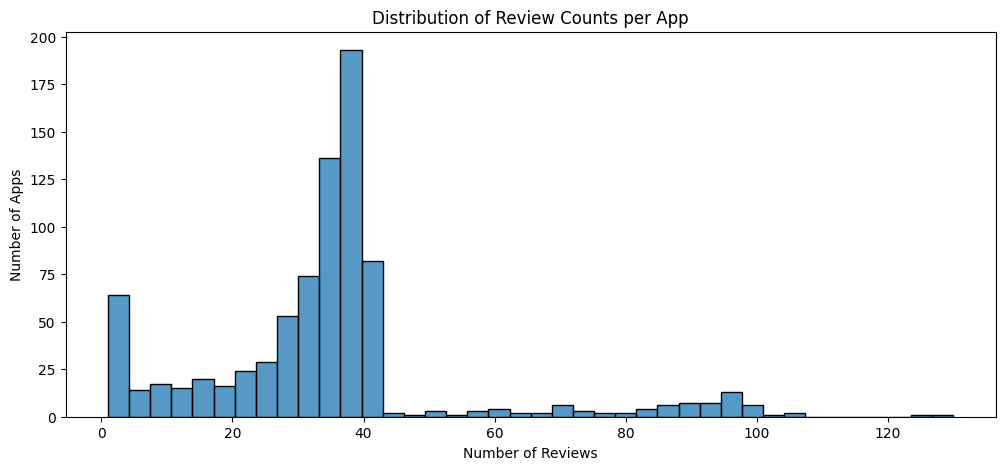

In [44]:
plt.figure(figsize=(12, 5))
sns.histplot(reviews_per_app, bins=40, kde=False)
plt.title('Distribution of Review Counts per App')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Apps')
plt.show()

In [49]:
type_counts = appreviews['Type'].value_counts()
type_counts
type_percent = (type_counts / type_counts.sum()) * 100
print(type_percent.round(2))

Type
Free    98.93
Paid     1.07
Name: count, dtype: float64


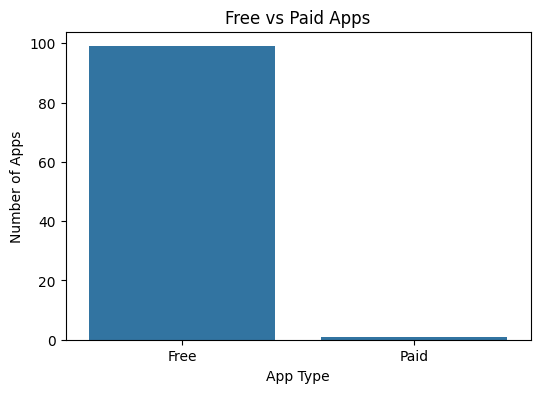

In [50]:
plt.figure(figsize=(6, 4))
sns.barplot(x=type_percent.index, y=type_percent.values)
plt.title('Free vs Paid Apps')
plt.ylabel('Number of Apps')
plt.xlabel('App Type')
plt.show()

In [51]:
appreviews.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.332768
AUTO_AND_VEHICLES      4.579505
BEAUTY                 4.263722
BOOKS_AND_REFERENCE    4.369854
BUSINESS               4.255556
COMICS                 4.311111
COMMUNICATION          4.240702
DATING                 4.079577
EDUCATION              4.220497
ENTERTAINMENT          4.102781
EVENTS                 4.335256
FAMILY                 4.353829
FINANCE                4.252844
FOOD_AND_DRINK         4.369125
GAME                   4.432366
HEALTH_AND_FITNESS     4.405367
HOUSE_AND_HOME         4.141573
LIBRARIES_AND_DEMO     4.055422
LIFESTYLE              4.190048
MAPS_AND_NAVIGATION    4.318519
MEDICAL                4.130796
NEWS_AND_MAGAZINES     4.242838
PARENTING              4.251563
PERSONALIZATION        4.339438
PHOTOGRAPHY            4.307947
PRODUCTIVITY           4.352511
SHOPPING               4.227273
SOCIAL                 4.134947
SPORTS                 4.278947
TOOLS                  4.246853
TRAVEL_AND_LOCAL       4.290458

In [61]:
top_rated_apps = (appreviews.sort_values(by='Rating', ascending=False)
              .drop_duplicates(subset=['App'])
              .groupby('Type')
              .head(10)
              .sort_values(['Type', 'Rating'], ascending=[True, False])
              [['App', 'Type', 'Rating', 'Installs', 'Category']]
)
top_rated_apps

,App,Type,Rating,Installs,Category
429,DMV Permit Practice Test 2018 Edition,Free,4.9,100000,AUTO_AND_VEHICLES
355,CDL Practice Test 2018 Edition,Free,4.9,100000,AUTO_AND_VEHICLES
8182,Down Dog: Great Yoga Anywhere,Free,4.9,500000,HEALTH_AND_FITNESS
16037,GoodRx Drug Prices and Coupons,Free,4.8,1000000,MEDICAL
5962,"Even - organize your money, get paid early",Free,4.8,100000,FINANCE
27897,"DU Recorder – Screen Recorder, Video Editor, Live",Free,4.8,50000000,VIDEO_PLAYERS
26993,Find a Way: Addictive Puzzle,Free,4.8,500000,FAMILY
22480,Calculator with Percent (Free),Free,4.8,1000000,TOOLS
15397,Fuzzy Seasons: Animal Forest,Free,4.8,100000,FAMILY
7443,Home Workout - No Equipment,Free,4.8,10000000,HEALTH_AND_FITNESS


In [71]:
top_downloaded_categories = (appreviews.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
)
top_downloaded_categories

Category
GAME                   198185400000
SOCIAL                 152422100000
PHOTOGRAPHY            116013500000
COMMUNICATION          112129000000
TOOLS                   91301500000
PRODUCTIVITY            55648300000
NEWS_AND_MAGAZINES      48995300000
FAMILY                  22258090000
BOOKS_AND_REFERENCE     20203100000
TRAVEL_AND_LOCAL        19891300000
Name: Installs, dtype: int64

In [72]:
top_downloaded_apps = (appreviews.drop_duplicates(subset='App').sort_values(by='Installs', ascending=False)[['App', 'Installs', 'Category', 'Type']].head(10)
)
top_downloaded_apps

,App,Installs,Category,Type
2177,Gmail,1000000000,COMMUNICATION,Free
20694,Google Street View,1000000000,TRAVEL_AND_LOCAL,Free
2217,Hangouts,1000000000,COMMUNICATION,Free
21630,Google,1000000000,TOOLS,Free
17288,Google+,1000000000,SOCIAL,Free
25918,Google News,1000000000,NEWS_AND_MAGAZINES,Free
18480,Google Photos,1000000000,PHOTOGRAPHY,Free
17095,Facebook,1000000000,SOCIAL,Free
2518,Google Duo - High Quality Video Calls,500000000,COMMUNICATION,Free
17225,Facebook Lite,500000000,SOCIAL,Free


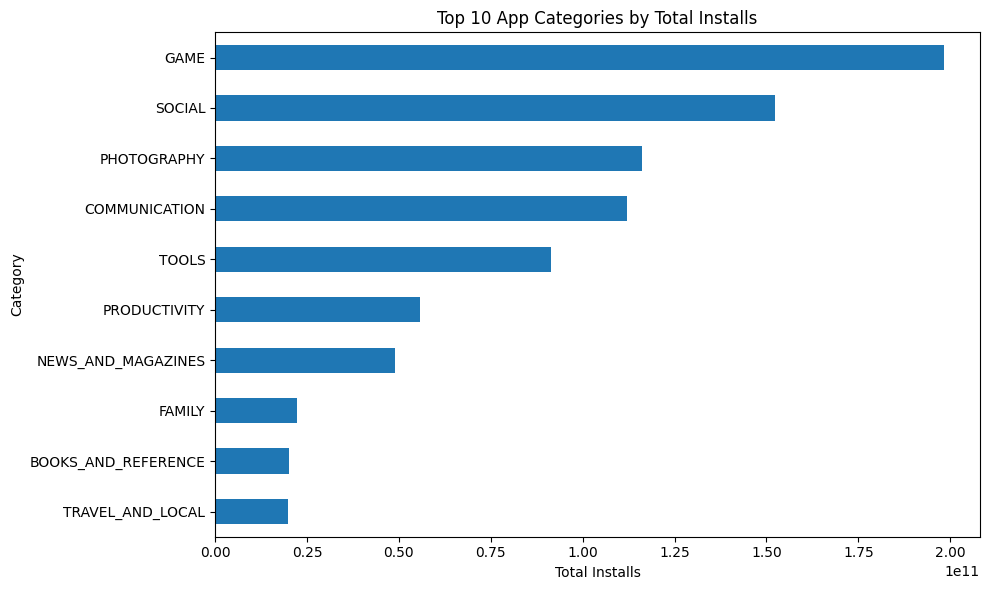

In [ ]:
plt.figure(figsize=(10, 6))
top_downloaded_categories.plot(kind='barh')
plt.title('Top 10 App Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


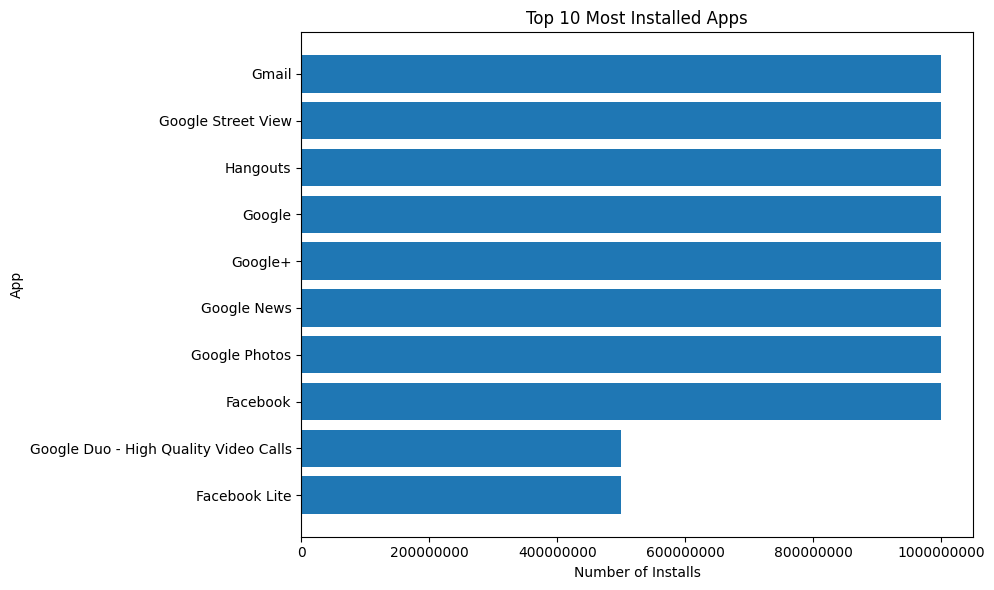

In [75]:
plt.figure(figsize=(10, 6))
plt.barh(top_downloaded_apps['App'], top_downloaded_apps['Installs'])
plt.title('Top 10 Most Installed Apps')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.gca().invert_yaxis()  # highest at top
plt.ticklabel_format(style='plain', axis='x') 
plt.tight_layout()
plt.show()


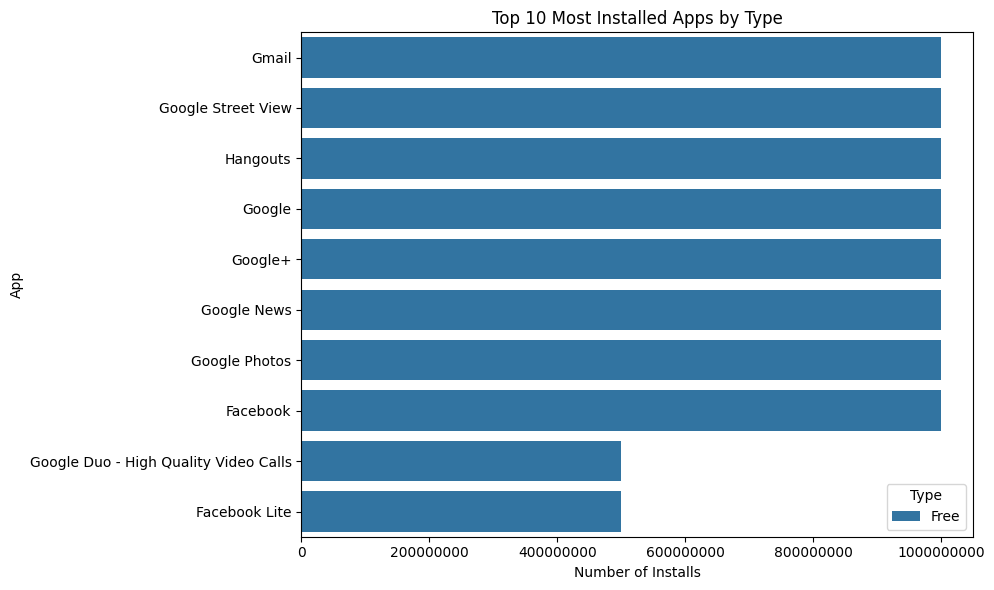

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_downloaded_apps,
    x='Installs',
    y='App',
    hue='Type',  # color by Free/Paid
    dodge=False
)
plt.title('Top 10 Most Installed Apps by Type')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


In [77]:
ratings_sentiment = (
    appreviews.groupby('App')
    .agg({
        'Rating': 'mean',
        'Sentiment_Polarity': 'mean'
    })
    .rename(columns={
        'Rating': 'Avg_Rating',
        'Sentiment_Polarity': 'Avg_Sentiment_Polarity'
    })
    .reset_index()
)


In [79]:
top_downloaded_apps = pd.merge(
    top_downloaded_apps,
    ratings_sentiment,
    on='App',
    how='left'
)
top_downloaded_apps

,App,Installs,Category,Type,Avg_Rating_x,Avg_Sentiment_Polarity_x,Avg_Rating_y,Avg_Sentiment_Polarity_y
0,Gmail,1000000000,COMMUNICATION,Free,4.3,0.058016,4.3,0.058016
1,Google Street View,1000000000,TRAVEL_AND_LOCAL,Free,4.2,-0.500000,4.2,-0.500000
2,Hangouts,1000000000,COMMUNICATION,Free,4.0,0.239355,4.0,0.239355
3,Google,1000000000,TOOLS,Free,4.4,0.260359,4.4,0.260359
4,Google+,1000000000,SOCIAL,Free,4.2,0.368056,4.2,0.368056
5,Google News,1000000000,NEWS_AND_MAGAZINES,Free,3.9,0.093930,3.9,0.093930
6,Google Photos,1000000000,PHOTOGRAPHY,Free,4.5,0.187021,4.5,0.187021
7,Facebook,1000000000,SOCIAL,Free,4.1,-0.005909,4.1,-0.005909
8,Google Duo - High Quality Video Calls,500000000,COMMUNICATION,Free,4.6,0.285690,4.6,0.285690
9,Facebook Lite,500000000,SOCIAL,Free,4.3,-0.000991,4.3,-0.000991


In [82]:
top_downloaded_apps['Avg_Rating'] = top_downloaded_apps['Avg_Rating_y']
top_downloaded_apps['Avg_Sentiment_Polarity'] = top_downloaded_apps['Avg_Sentiment_Polarity_y']
top_downloaded_apps.drop(columns=[
    'Avg_Rating_x', 'Avg_Rating_y',
    'Avg_Sentiment_Polarity_x', 'Avg_Sentiment_Polarity_y'
], inplace=True)

top_downloaded_apps

,App,Installs,Category,Type,Avg_Rating,Avg_Sentiment_Polarity
0,Gmail,1000000000,COMMUNICATION,Free,4.3,0.058016
1,Google Street View,1000000000,TRAVEL_AND_LOCAL,Free,4.2,-0.500000
2,Hangouts,1000000000,COMMUNICATION,Free,4.0,0.239355
3,Google,1000000000,TOOLS,Free,4.4,0.260359
4,Google+,1000000000,SOCIAL,Free,4.2,0.368056
5,Google News,1000000000,NEWS_AND_MAGAZINES,Free,3.9,0.093930
6,Google Photos,1000000000,PHOTOGRAPHY,Free,4.5,0.187021
7,Facebook,1000000000,SOCIAL,Free,4.1,-0.005909
8,Google Duo - High Quality Video Calls,500000000,COMMUNICATION,Free,4.6,0.285690
9,Facebook Lite,500000000,SOCIAL,Free,4.3,-0.000991


In [83]:
top_sentiment = top_downloaded_apps.sort_values(by='Avg_Sentiment_Polarity', ascending=False)


In [ ]:

def sentiment_color(polarity):
    if polarity >= 0.3:
        return 'green'
    elif polarity <= 0:
        return 'red'
    else:
        return 'gold'

colors = top_sentiment['Avg_Sentiment_Polarity'].apply(sentiment_color)


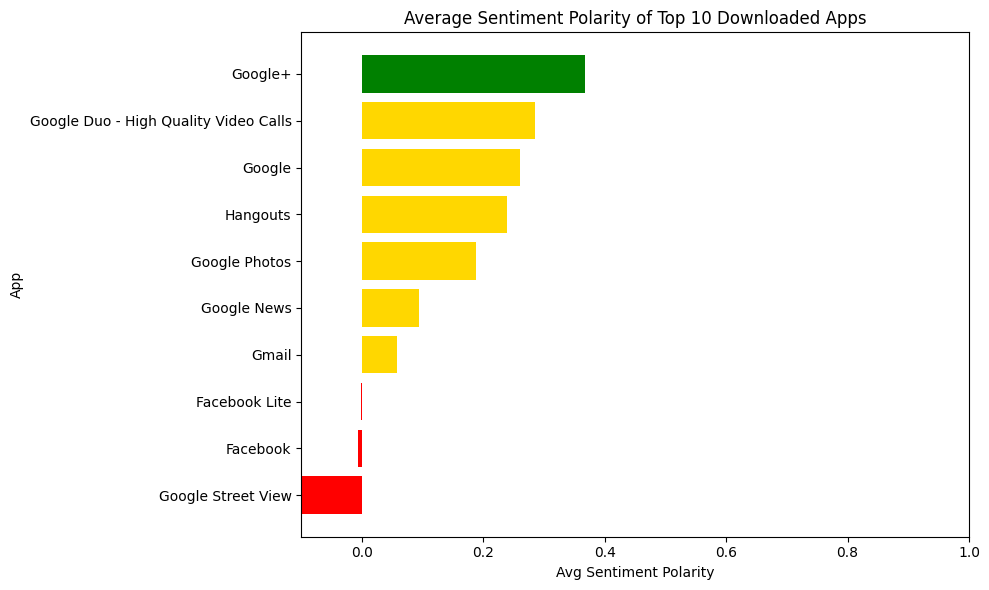

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_sentiment['App'], top_sentiment['Avg_Sentiment_Polarity'], color=colors)
plt.title('Average Sentiment Polarity of Top 10 Downloaded Apps')
plt.xlabel('Avg Sentiment Polarity')
plt.ylabel('App')
plt.xlim(-0.1, 1.0)
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()


In [86]:
sentiment_dist = appreviews.groupby('App')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
sentiment_dist.head()

Sentiment,Negative,Neutral,Positive
App,,,
10 Best Foods for You,0.052632,0.115789,0.831579
11st,0.179487,0.230769,0.589744
1800 Contacts - Lens Store,0.075000,0.125000,0.800000
1LINE – One Line with One Touch,0.210526,0.078947,0.710526
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.034483,0.206897,0.758621


In [88]:
app_sentiment_rating = appreviews.groupby('App').agg({
    'Rating': 'mean',
    'Sentiment_Polarity': 'mean'
}).reset_index()

# Compute correlation only on the numeric columns
app_sentiment_rating[['Rating', 'Sentiment_Polarity']].corr()



,Rating,Sentiment_Polarity
Rating,1.00000,0.26729
Sentiment_Polarity,0.26729,1.00000


In [98]:
top_sentiment_apps = sentiment_dist.head(10)
top_sentiment_apps

Sentiment,Negative,Neutral,Positive
App,,,
10 Best Foods for You,0.052632,0.115789,0.831579
11st,0.179487,0.230769,0.589744
1800 Contacts - Lens Store,0.075000,0.125000,0.800000
1LINE – One Line with One Touch,0.210526,0.078947,0.710526
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.034483,0.206897,0.758621
21-Day Meditation Experience,0.121951,0.024390,0.853659
"2Date Dating App, Love and matching",0.184211,0.131579,0.684211
2GIS: directory & navigator,0.150000,0.275000,0.575000
2RedBeans,0.055556,0.166667,0.777778


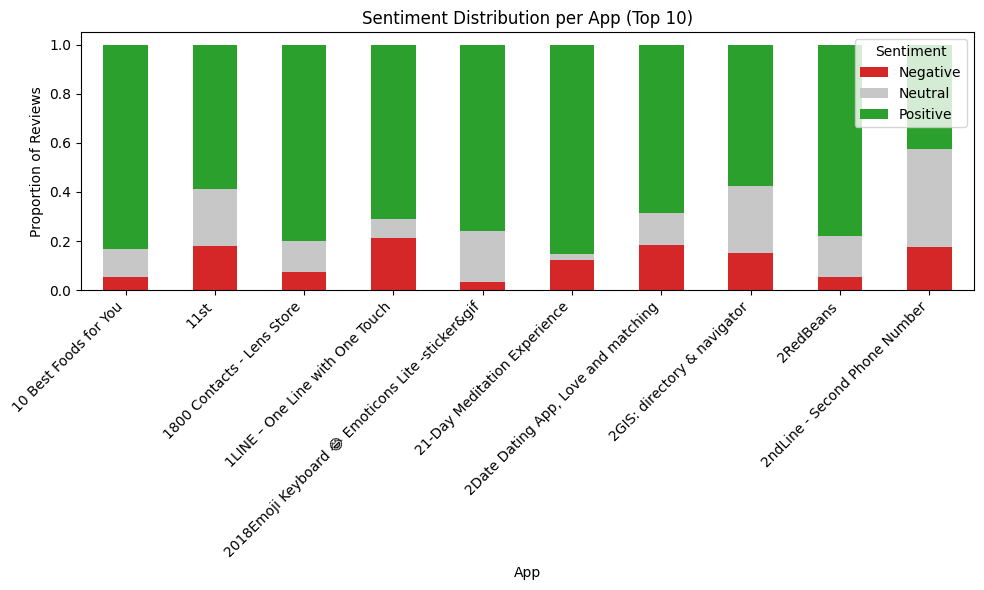

In [102]:
import matplotlib.pyplot as plt

# Define new color order: Negative (red), Neutral (gray), Positive (green)
colors = ['#d62728', '#c7c7c7', '#2ca02c']  # red, gray, green

# Plot with reordered columns
top_sentiment_apps[['Negative', 'Neutral', 'Positive']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=colors
)

plt.title('Sentiment Distribution per App (Top 10)')
plt.xlabel('App')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()



In [103]:
top_loved = appreviews.groupby('App')['Sentiment_Polarity'].mean().sort_values(ascending=False).head(10)
top_hated = appreviews.groupby('App')['Sentiment_Polarity'].mean().sort_values().head(10)


In [92]:
top_hated

App
Google Street View               -0.500000
DEER HUNTER 2018                 -0.383333
Fruit Block - Puzzle Legend      -0.183333
Call of Duty:Black Ops Zombies   -0.162120
Draw A Stickman                  -0.150000
Guns of Glory                    -0.142060
Hitwe - meet people and chat     -0.139456
Draw In                          -0.134167
Best Car Wallpapers              -0.133333
Anthem BC Anywhere               -0.123233
Name: Sentiment_Polarity, dtype: float64

In [93]:
top_loved

App
HomeWork                                              1.000000
Google Slides                                         0.933333
Daily Workouts - Exercise Fitness Routine Trainer     0.800000
Bed Time Fan - White Noise Sleep Sounds               0.781250
Cameringo Lite. Filters Camera                        0.770269
Google Primer                                         0.750000
GPS Map Free                                          0.700000
GPS Speedometer and Odometer                          0.650000
Best Ovulation Tracker Fertility Calendar App Glow    0.595313
3D Live Neon Weed Launcher                            0.568182
Name: Sentiment_Polarity, dtype: float64

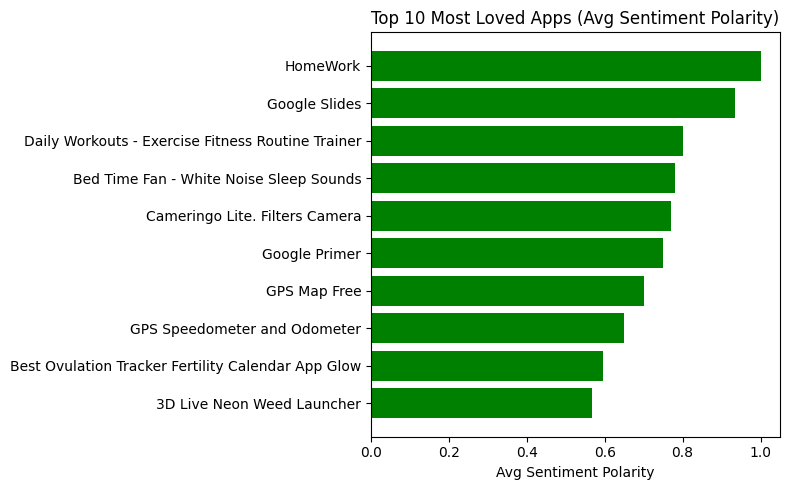

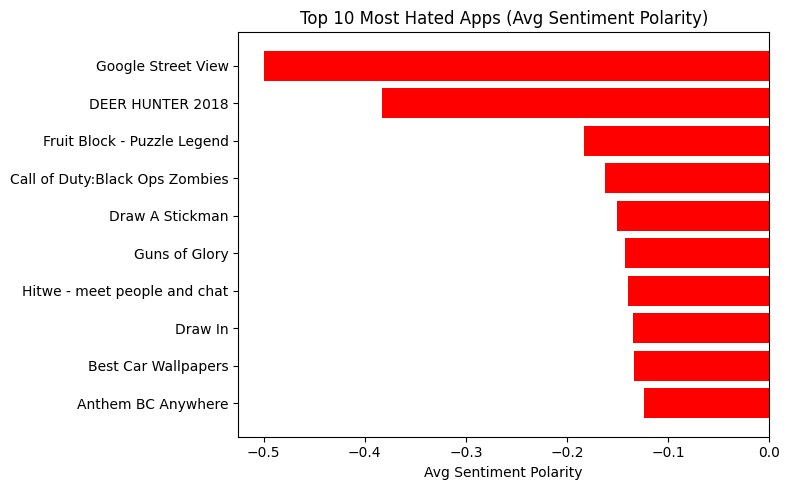

In [104]:
top_loved_df = top_loved.reset_index()
top_hated_df = top_hated.reset_index()

# Plot loved apps
plt.figure(figsize=(8, 5))
plt.barh(top_loved_df['App'], top_loved_df['Sentiment_Polarity'], color='green')
plt.title('Top 10 Most Loved Apps (Avg Sentiment Polarity)')
plt.xlabel('Avg Sentiment Polarity')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot hated apps
plt.figure(figsize=(8, 5))
plt.barh(top_hated_df['App'], top_hated_df['Sentiment_Polarity'], color='red')
plt.title('Top 10 Most Hated Apps (Avg Sentiment Polarity)')
plt.xlabel('Avg Sentiment Polarity')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [110]:
category_sentiment = appreviews.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)
category_sentiment.head(10)  # most liked


Category
COMICS                 0.449810
EVENTS                 0.375086
AUTO_AND_VEHICLES      0.343119
PARENTING              0.313316
EDUCATION              0.297454
HEALTH_AND_FITNESS     0.294396
WEATHER                0.281344
FOOD_AND_DRINK         0.279847
PERSONALIZATION        0.274741
MAPS_AND_NAVIGATION    0.259767
Name: Sentiment_Polarity, dtype: float64

In [111]:

category_sentiment.tail(10)  # most disliked


Category
PRODUCTIVITY          0.194531
DATING                0.179436
FINANCE               0.171977
COMMUNICATION         0.171862
NEWS_AND_MAGAZINES    0.152946
VIDEO_PLAYERS         0.136103
ENTERTAINMENT         0.133953
FAMILY                0.119083
SOCIAL                0.108144
GAME                  0.068535
Name: Sentiment_Polarity, dtype: float64

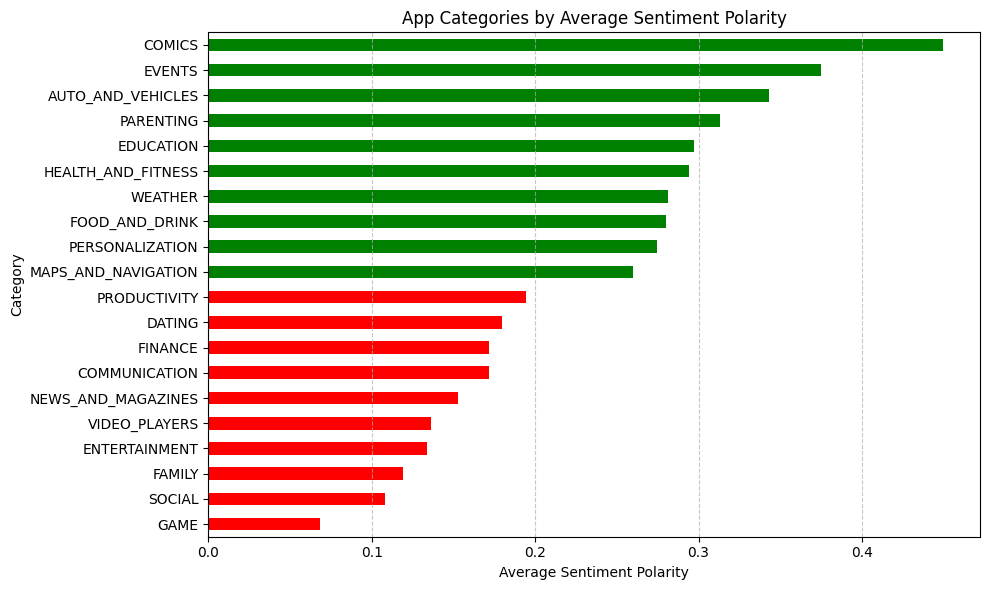

In [ ]:
top_categories = category_sentiment.head(10)
bottom_categories = category_sentiment.tail(10)

combined = pd.concat([top_categories, bottom_categories])
combined = combined.sort_values()  # Sort for better bar chart layout

# Plot
plt.figure(figsize=(10, 6))
combined.plot(kind='barh', color=combined.apply(lambda x: 'green' if x > 0.25 else 'red'))

plt.title('App Categories by Average Sentiment Polarity')
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [112]:
appreviews['Review_Length'] = appreviews['Review'].apply(len)
appreviews[['Review_Length', 'Sentiment_Polarity']].corr()

,Review_Length,Sentiment_Polarity
Review_Length,1.000000,-0.153106
Sentiment_Polarity,-0.153106,1.000000


We found a weak negative correlation (-0.15) between review length and sentiment polarity. This implies that longer reviews are slightly more likely to express negative sentiment, possibly because users explain complaints in detail.

In [113]:
appreviews['Review_Length'] = appreviews['Review'].apply(len)
# Group by Type and compute correlation
free_corr = appreviews[appreviews['Type'] == 'Free'][['Review_Length', 'Sentiment_Polarity']].corr().iloc[0, 1]
paid_corr = appreviews[appreviews['Type'] == 'Paid'][['Review_Length', 'Sentiment_Polarity']].corr().iloc[0, 1]

print(f"Correlation (Free apps): {free_corr:.3f}")
print(f"Correlation (Paid apps): {paid_corr:.3f}")


Correlation (Free apps): -0.154
Correlation (Paid apps): -0.174


These weak negative correlations suggest that longer reviews tend to express more negative sentiment. This trend is slightly stronger for paid apps, likely because users who pay for apps have higher expectations and feel more compelled to explain dissatisfaction in detail.

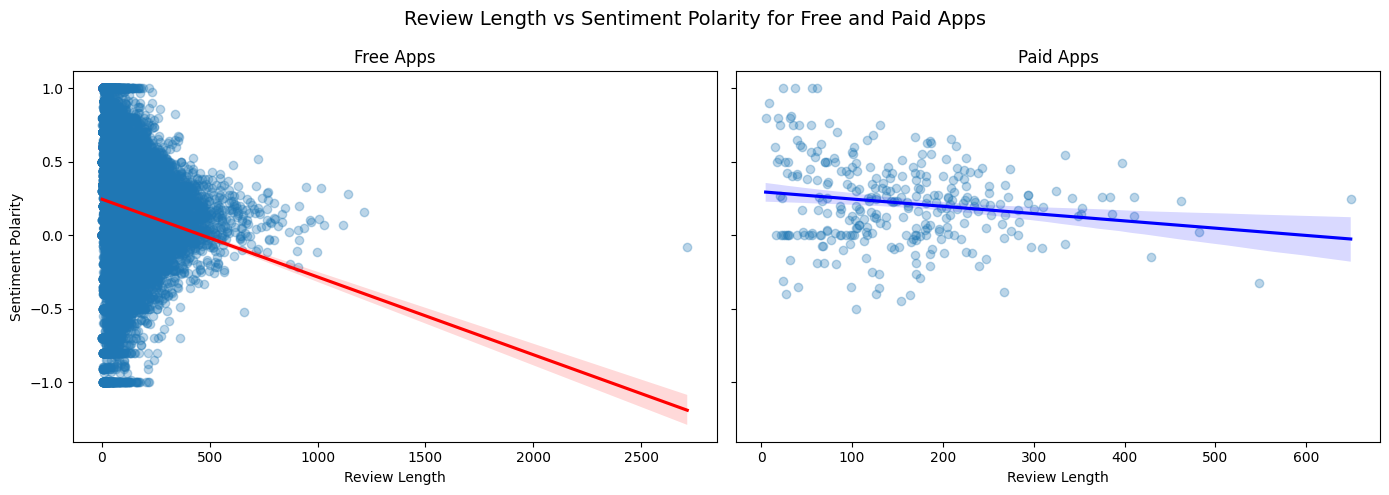

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

free_apps = appreviews[appreviews['Type'] == 'Free']
paid_apps = appreviews[appreviews['Type'] == 'Paid']

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for Free apps
sns.regplot(data=free_apps, x='Review_Length', y='Sentiment_Polarity',
            scatter_kws={'alpha':0.3}, line_kws={"color":"red"}, ax=axes[0])
axes[0].set_title('Free Apps')
axes[0].set_xlabel('Review Length')
axes[0].set_ylabel('Sentiment Polarity')

# Plot for Paid apps
sns.regplot(data=paid_apps, x='Review_Length', y='Sentiment_Polarity',
            scatter_kws={'alpha':0.3}, line_kws={"color":"blue"}, ax=axes[1])
axes[1].set_title('Paid Apps')
axes[1].set_xlabel('Review Length')
axes[1].set_ylabel('')

plt.suptitle('Review Length vs Sentiment Polarity for Free and Paid Apps', fontsize=14)
plt.tight_layout()
plt.show()


In [117]:
polarizing = appreviews.groupby('App')['Sentiment_Polarity'].std().sort_values(ascending=False).head(10)
polarizing

App
Davis's Drug Guide                                    0.854400
CM Browser - Ad Blocker , Fast Download , Privacy     0.724784
3D Live Neon Weed Launcher                            0.610683
Coloring book moana                                   0.607532
Diamond Zipper Lock Screen                            0.597429
Debonairs Pizza                                       0.586269
HD Camera - Best Cam with filters & panorama          0.584942
HTC Calendar                                          0.577354
Home Decor Showpiece Art making: Medium Difficulty    0.557969
All Email Providers                                   0.557225
Name: Sentiment_Polarity, dtype: float64

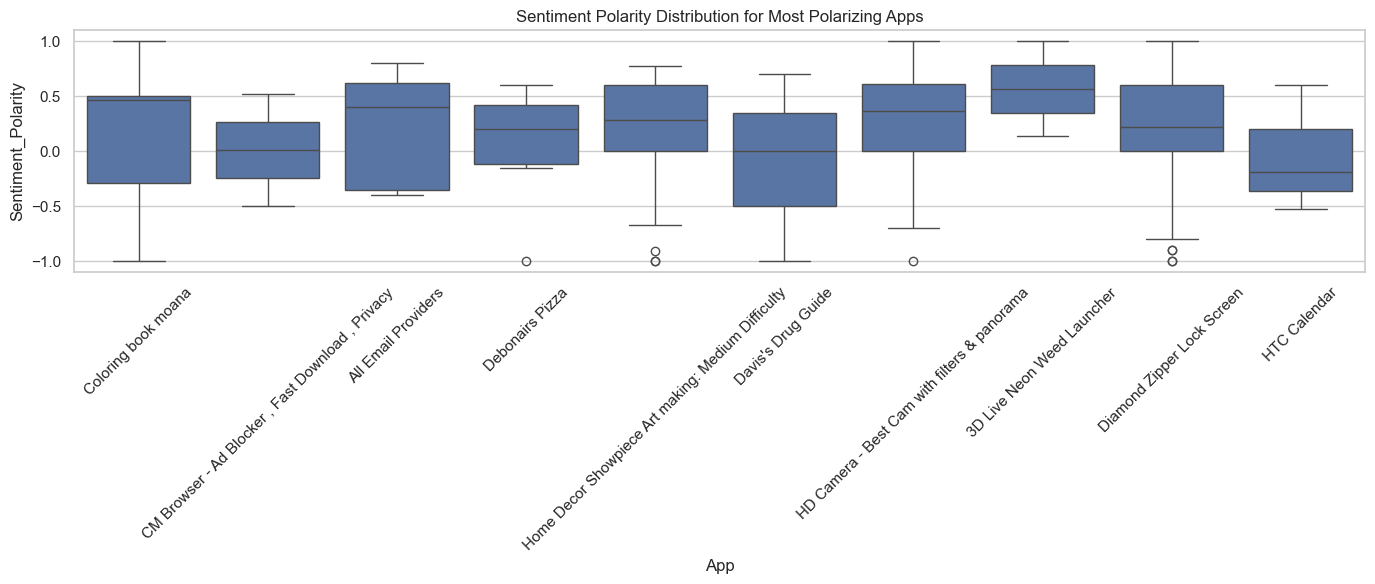

In [118]:
polarizing_apps = polarizing.index.tolist()
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))

sns.boxplot(
    data=appreviews[appreviews['App'].isin(polarizing_apps)],
    x='App',
    y='Sentiment_Polarity'
)
plt.xticks(rotation=45)
plt.title("Sentiment Polarity Distribution for Most Polarizing Apps")
plt.tight_layout()
plt.show()


In [119]:
ratings = appreviews[appreviews['App'].isin(polarizing_apps)].groupby('App')['Rating'].mean()
ratings.sort_values(ascending=False)


App
CM Browser - Ad Blocker , Fast Download , Privacy     4.6
3D Live Neon Weed Launcher                            4.5
HD Camera - Best Cam with filters & panorama          4.5
Diamond Zipper Lock Screen                            4.3
Home Decor Showpiece Art making: Medium Difficulty    4.3
All Email Providers                                   4.1
Coloring book moana                                   3.9
Davis's Drug Guide                                    3.9
HTC Calendar                                          3.9
Debonairs Pizza                                       3.8
Name: Rating, dtype: float64

In [120]:
appreviews['Content Rating'].value_counts()

Content Rating
Everyone           22295
Teen                3225
Mature 17+          1619
Everyone 10+        1076
Adults only 18+       35
Name: count, dtype: int64

In [121]:
appreviews['Content Rating'].value_counts(normalize=True)


Content Rating
Everyone           0.789204
Teen               0.114159
Mature 17+         0.057310
Everyone 10+       0.038088
Adults only 18+    0.001239
Name: proportion, dtype: float64

In [122]:
appreviews.groupby('Content Rating')['Rating'].mean().sort_values(ascending=False)

Content Rating
Adults only 18+    4.500000
Everyone 10+       4.368680
Teen               4.339628
Everyone           4.291792
Mature 17+         4.119704
Name: Rating, dtype: float64

In [123]:
appreviews.groupby('Content Rating')['Sentiment_Polarity'].mean().sort_values(ascending=False)

Content Rating
Adults only 18+    0.298400
Everyone           0.196195
Mature 17+         0.179449
Teen               0.152236
Everyone 10+       0.141834
Name: Sentiment_Polarity, dtype: float64

In [124]:
appreviews.groupby('Content Rating').agg({
    'Rating': 'mean',
    'Sentiment_Polarity': 'mean'
}).sort_values('Rating', ascending=False)


,Rating,Sentiment_Polarity
Content Rating,,
Adults only 18+,4.500000,0.298400
Everyone 10+,4.368680,0.141834
Teen,4.339628,0.152236
Everyone,4.291792,0.196195
Mature 17+,4.119704,0.179449


C:\Users\karim\AppData\Local\Temp\ipykernel_13196\1236567280.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\karim\AppData\Local\Temp\ipykernel_13196\1236567280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


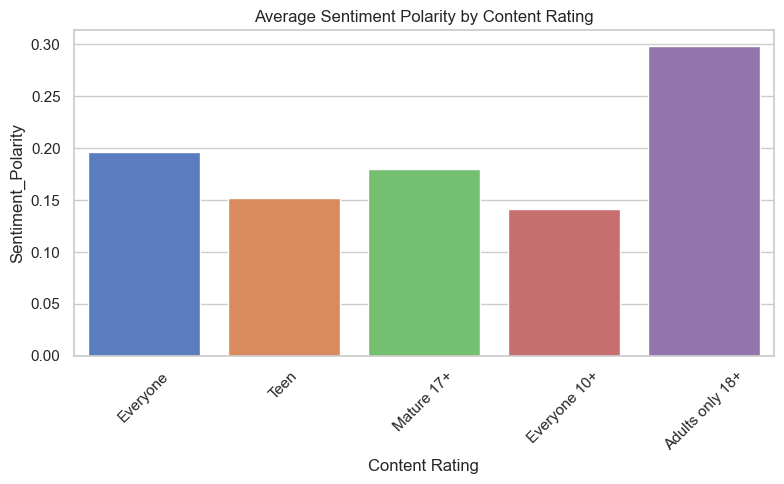

In [125]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=appreviews,
    x='Content Rating',
    y='Sentiment_Polarity',
    estimator='mean',
    ci=None,
    palette='muted'
)
plt.title('Average Sentiment Polarity by Content Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [126]:
adult_apps = apps[apps['Content Rating'] == 'Adults only 18+']
adult_apps.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
262,298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.90000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
2378,3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41.00000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
5415,6424,Manga Books,COMICS,3.8,7326,21.75449,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [129]:
adult_apps_stats = appreviews[appreviews['App'].isin(adult_apps['App'])] \
    .groupby('App')[['Rating', 'Sentiment_Polarity']].mean() \
    .sort_values('Sentiment_Polarity', ascending=False)
adult_apps_stats.head(10)  # top loved 18+ apps


,Rating,Sentiment_Polarity
App,,
DraftKings - Daily Fantasy Sports,4.5,0.2984


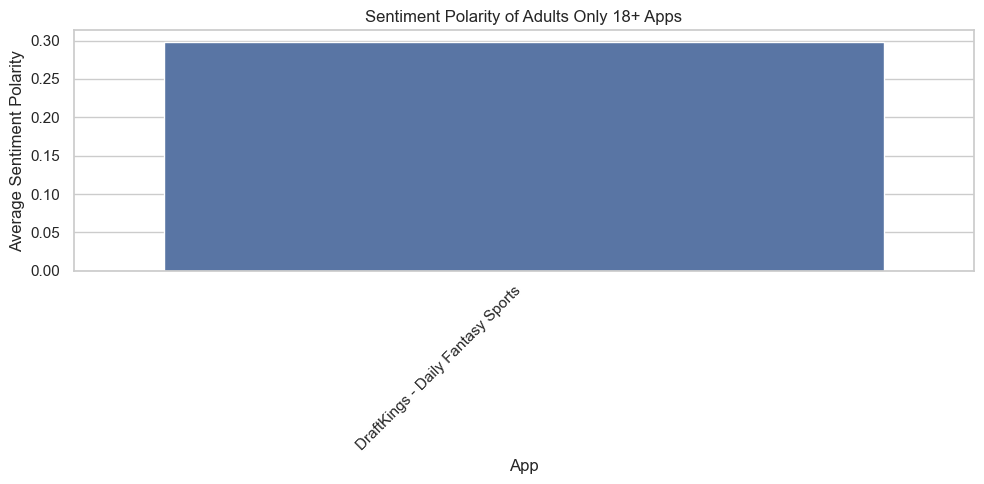

In [131]:
adult_apps_stats.sort_values('Sentiment_Polarity', ascending=True, inplace=True)
plt.figure(figsize=(10,5))
sns.barplot(x=adult_apps_stats.index, y='Sentiment_Polarity', data=adult_apps_stats)
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Polarity of Adults Only 18+ Apps')
plt.ylabel('Average Sentiment Polarity')
plt.xlabel('App')
plt.tight_layout()
plt.show()


In [133]:
appreviews[
    appreviews['App'] == 'DraftKings – Daily Fantasy Sports'
][['Review', 'Sentiment_Polarity']].sort_values(by='Sentiment_Polarity', ascending=False).head(5)


,Review,Sentiment_Polarity


In [132]:
appreviews.groupby('Content Rating')['Sentiment_Polarity'].std().sort_values(ascending=False)


Content Rating
Mature 17+         0.364347
Everyone           0.358127
Teen               0.331708
Adults only 18+    0.329005
Everyone 10+       0.323088
Name: Sentiment_Polarity, dtype: float64

C:\Users\karim\AppData\Local\Temp\ipykernel_13196\630136063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=std_sentiment_by_content.values, y=std_sentiment_by_content.index, palette='magma')


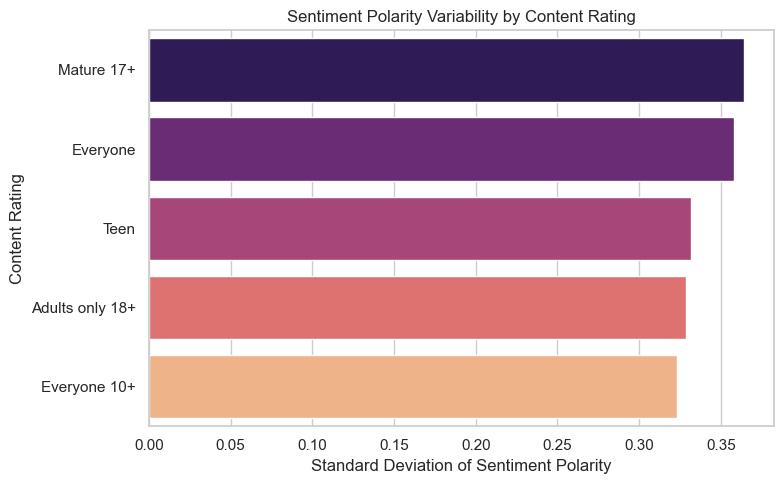

In [ ]:
std_sentiment_by_content = appreviews.groupby('Content Rating')['Sentiment_Polarity'].std().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=std_sentiment_by_content.values, y=std_sentiment_by_content.index, palette='magma')
plt.title('Sentiment Polarity Variability by Content Rating')
plt.xlabel('Standard Deviation of Sentiment Polarity')
plt.ylabel('Content Rating')
plt.tight_layout()
plt.show()


Reviews for apps rated Mature 17+ and Everyone show the highest variability in sentiment, suggesting more polarized user experiences. In contrast, Everyone 10+ and Adults only 18+ apps tend to have more consistent sentiment, possibly indicating clearer expectations or niche audiences.

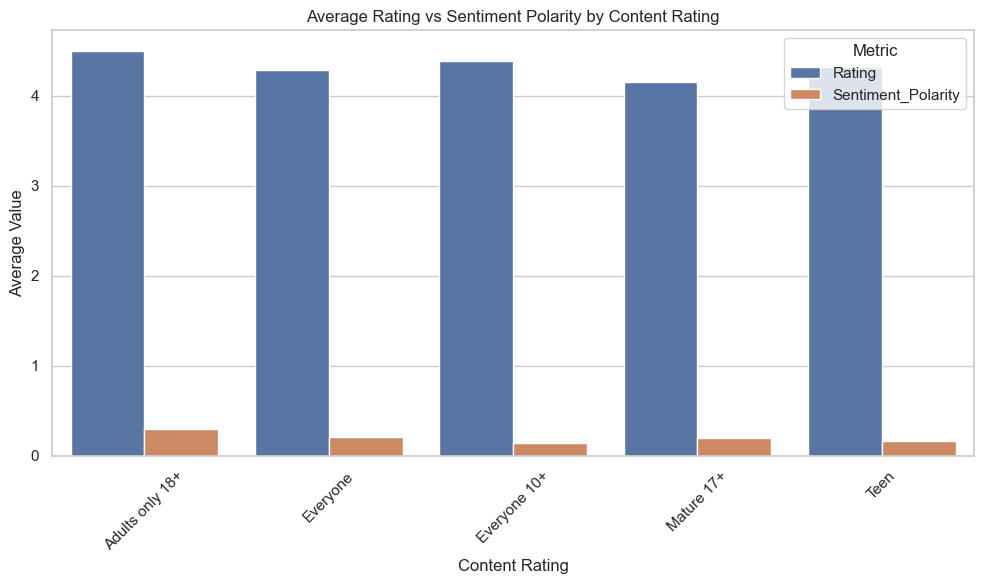

In [135]:

avg_sentiment = appreviews.groupby('App')['Sentiment_Polarity'].mean().reset_index()
avg_rating = appreviews.groupby('App')['Rating'].mean().reset_index()
app_sentiment_rating = pd.merge(avg_sentiment, avg_rating, on='App')

apps_subset = apps[['App', 'Content Rating']].drop_duplicates()
combined = pd.merge(app_sentiment_rating, apps_subset, on='App')

# Group by Content Rating
grouped = combined.groupby('Content Rating')[['Rating', 'Sentiment_Polarity']].mean().reset_index()

melted = grouped.melt(id_vars='Content Rating', 
                      value_vars=['Rating', 'Sentiment_Polarity'],
                      var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=melted, x='Content Rating', y='Value', hue='Metric')
plt.title('Average Rating vs Sentiment Polarity by Content Rating')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Sometimes ratings and written sentiment diverge.

In [136]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], errors='coerce')
apps['Update_Month'] = apps['Last Updated'].dt.to_period('M')

In [137]:
avg_sentiment = appreviews.groupby('App')['Sentiment_Polarity'].mean().reset_index()
combined = pd.merge(avg_sentiment, apps[['App', 'Update_Month']], on='App')

In [ ]:
sentiment_over_time = combined.groupby('Update_Month')['Sentiment_Polarity'].mean().reset_index()
sentiment_over_time['Update_Month'] = sentiment_over_time['Update_Month'].astype(str)
sentiment_over_time.head(10)

,Update_Month,Sentiment_Polarity
0,2011-06,0.193917
1,2012-01,0.065829
2,2013-03,0.106241
3,2013-09,0.259583
4,2013-12,0.408695
5,2014-04,0.236889
6,2014-05,0.247568
7,2014-07,0.146139
8,2014-08,0.378221
9,2014-12,0.180237


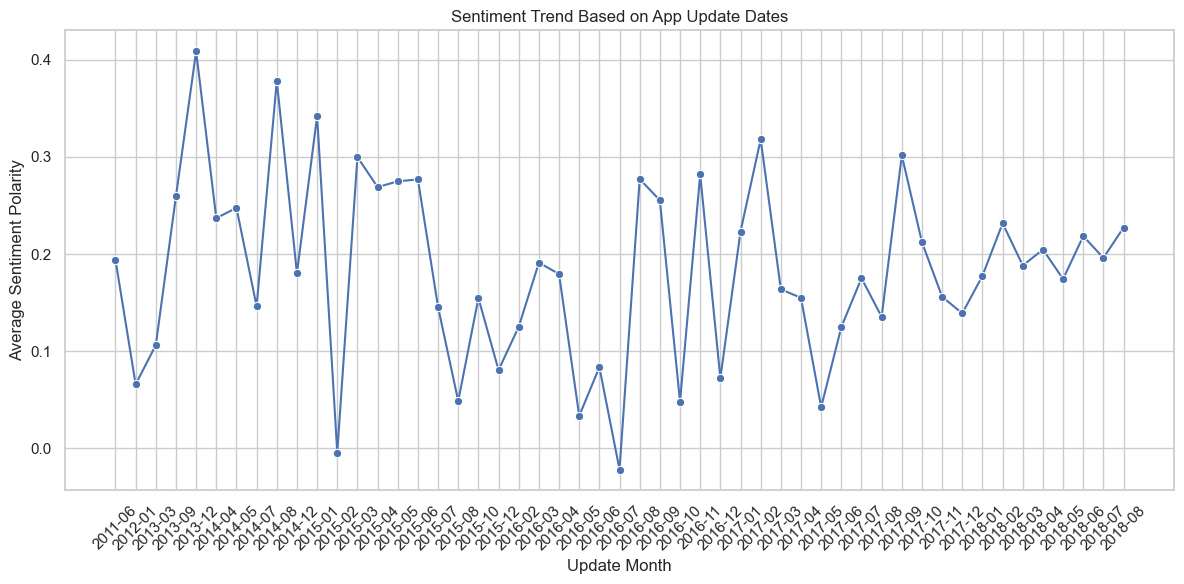

In [142]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sentiment_over_time, x='Update_Month', y='Sentiment_Polarity', marker='o')
plt.xticks(rotation=45)
plt.title('Sentiment Trend Based on App Update Dates')
plt.ylabel('Average Sentiment Polarity')
plt.xlabel('Update Month')
plt.tight_layout()
plt.show()

 Peaks (e.g., 2013-10, 2014-06, 2017-09)
 Dips (e.g., 2015-02, 2016-06, 2017-05)
 The plot shows frequent sentiment swings, which could suggest: inconsistent app update quality across the market or sensitivity to UX changes or external events
 

MODELING

In [145]:
apps['Success'] = ((apps['Rating'] >= 4.0) & (apps['Installs'] >= 100000)).astype(int)

In [146]:
features = ['Reviews', 'Size', 'Installs', 'Price', 'Sentiment_Polarity', 'Review_Length', 
            'Type', 'Category', 'Content Rating']

In [149]:
appreviews['Review_Length'] = appreviews['Review'].astype(str).apply(len)

sentiment_agg = appreviews.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Review_Length': 'mean'
}).reset_index()


In [151]:
apps = apps.merge(sentiment_agg, on='App', how='left')


In [152]:
df = pd.get_dummies(apps[features], drop_first=True)


In [158]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [159]:
from sklearn.metrics import classification_report

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.68      0.92      0.79       832
           1       0.88      0.56      0.68       808

    accuracy                           0.74      1640
   macro avg       0.78      0.74      0.73      1640
weighted avg       0.78      0.74      0.73      1640

Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       832
           1       0.83      0.93      0.88       808

    accuracy                           0.88      1640
   macro avg       0.88      0.88      0.87      1640
weighted avg       0.88      0.88      0.87      1640



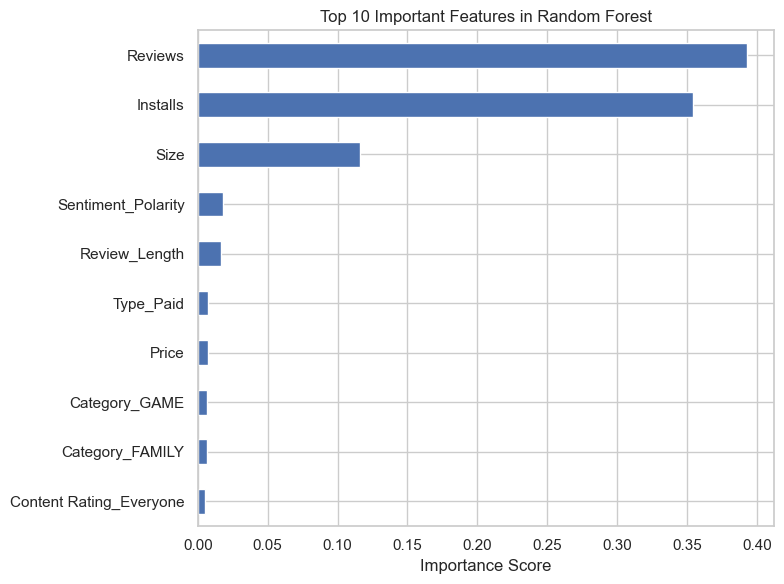

In [160]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Important Features in Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [171]:
sample_app = df.iloc[3]

In [173]:
# Reshape for prediction 
sample_input = sample_app.to_frame().T

# Impute missing values if necessary
sample_input_imputed = imputer.transform(sample_input)

# Predict
predicted_class = rf.predict(sample_input_imputed)
predicted_proba = rf.predict_proba(sample_input_imputed)

print("Prediction:", "Successful" if predicted_class[0] == 1 else "Unsuccessful")
print("Probability of Success:", round(predicted_proba[0][1], 3))


Prediction: Successful
Probability of Success: 0.91


In [174]:
apps.iloc[3][['App', 'Category', 'Rating', 'Installs', 'Reviews']]


App         Sketch - Draw & Paint
Category           ART_AND_DESIGN
Rating                        4.5
Installs                 50000000
Reviews                    215644
Name: 3, dtype: object

In [175]:
import joblib
joblib.dump(rf, 'app_success_predictor.pkl')


['app_success_predictor.pkl']

CONCLUSION


**EDA Findings**: Positive user sentiment tends to align with higher ratings and is influenced by content rating and update frequency.

**Modeling Results**:
  - Logistic Regression Accuracy: ~74%
  - Random Forest Accuracy: ~88% (best-performing model)
- **Feature Importance**: Review count, install base, and rating are key success predictors.
- **Real App Test**: The model predicted "Sketch - Draw & Paint" as successful with 91% confidence.


This project demonstrates how user feedback and market signals can be combined to predict app performance.